In [210]:
import pandas   as pd
import seaborn  as sns
import matplotlib.pyplot as plt

In [211]:
# read data
data = pd.read_csv("C:\\Users\\ritth\\code\\Strive\\Google-Fit\\data\\dataset_5secondWindow.csv")
data.sample(5)

,Unnamed: 0,id,time,activityrecognition#0,activityrecognition#1,android.sensor.accelerometer#mean,android.sensor.accelerometer#min,android.sensor.accelerometer#max,android.sensor.accelerometer#std,android.sensor.game_rotation_vector#mean,...,sound#mean,sound#min,sound#max,sound#std,speed#mean,speed#min,speed#max,speed#std,target,user
1732,1732,489,21.0,NaN,100.0,9.733862,9.497985,9.891418,0.118742,0.734031,...,89.713293,89.713293,89.713293,0.014564,NaN,NaN,NaN,NaN,Bus,U1
4643,4643,7296,95.0,NaN,100.0,10.582088,8.589124,13.955928,1.944233,0.945666,...,84.238955,84.238955,84.238955,0.095157,0.75000,0.75000,0.75000,NaN,Walking,U1
2932,2932,16901,20.0,NaN,100.0,9.809989,9.777413,9.848402,0.021756,0.988295,...,NaN,NaN,NaN,NaN,0.00000,0.00000,0.00000,NaN,Still,U12
1015,1015,20934,16.0,NaN,75.0,10.012502,8.145402,11.400096,0.630563,0.997025,...,85.241424,85.241424,85.241424,4.375082,13.98056,13.98056,13.98056,NaN,Car,U11
5141,5141,14408,52.0,NaN,100.0,10.290860,5.564306,13.552417,3.085715,0.742623,...,76.372435,76.372435,76.372435,2.009994,NaN,NaN,NaN,NaN,Walking,U2


In [212]:
data.shape

(5893, 71)

In [213]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5893 entries, 0 to 5892
Data columns (total 71 columns):
 #   Column                                           Non-Null Count  Dtype  
---  ------                                           --------------  -----  
 0   Unnamed: 0                                       5893 non-null   int64  
 1   id                                               5893 non-null   int64  
 2   time                                             5893 non-null   float64
 3   activityrecognition#0                            0 non-null      float64
 4   activityrecognition#1                            5893 non-null   float64
 5   android.sensor.accelerometer#mean                5893 non-null   float64
 6   android.sensor.accelerometer#min                 5893 non-null   float64
 7   android.sensor.accelerometer#max                 5893 non-null   float64
 8   android.sensor.accelerometer#std                 5893 non-null   float64
 9   android.sensor.game_rotation_v

### Drop some columns

In [214]:
data = data.drop(['activityrecognition#0', 'user', 'id'], axis=1)
data = data.drop(['Unnamed: 0'], axis=1)


In [215]:
data.shape

(5893, 67)

### Split target and features

In [216]:
X = data.drop(['target'], axis = 1)
Y = data['target']

In [217]:
Y.value_counts()

Car        1180
Train      1179
Still      1179
Bus        1178
Walking    1177
Name: target, dtype: int64

### Missng values

<AxesSubplot:title={'center':'Finding Null Values Using Heatmap\n'}>

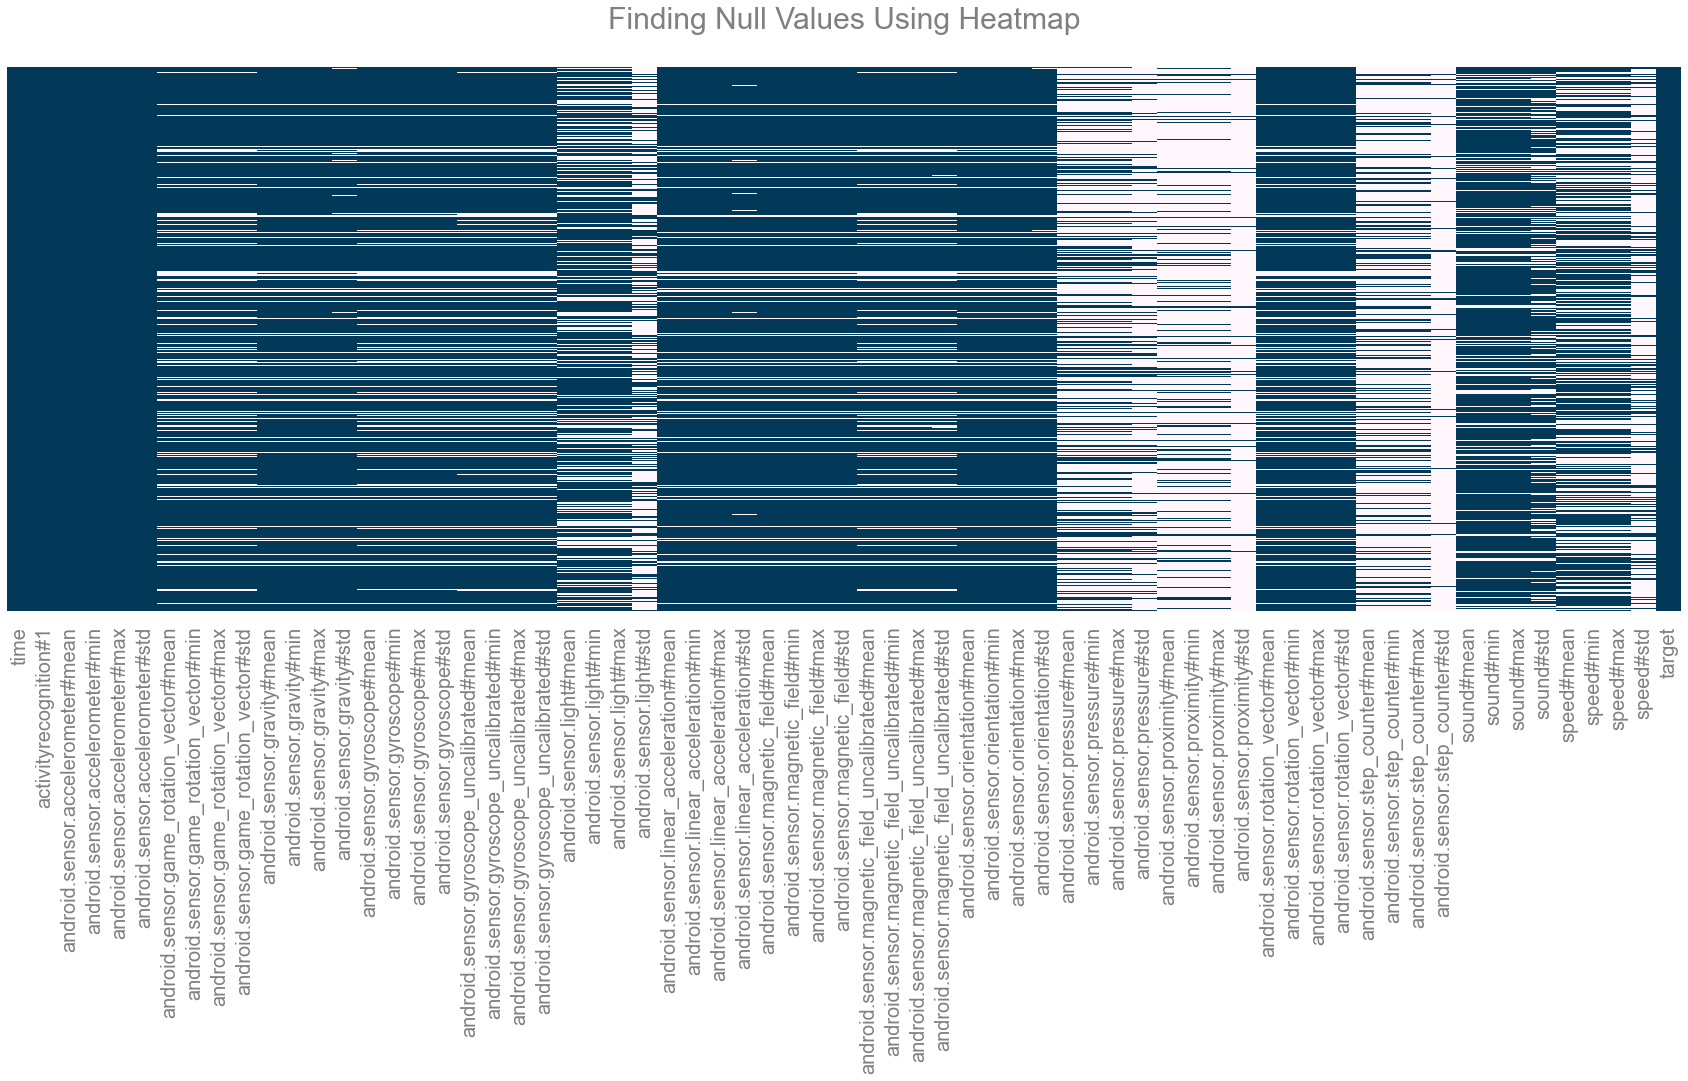

In [218]:
plt.figure(figsize = (30, 10))
plt.xticks(size = 20, color ='grey')
plt.tick_params(size = 12, color ='grey')
plt.title('Finding Null Values Using Heatmap\n', color ='grey', size = 30)
sns.heatmap(data.isnull(),
            yticklabels = False,
            cbar = False,
            cmap = 'PuBu_r',
            )
#plt.savefig("Finding Null values")

### Distribution of the data

In [219]:
# for i in X.columns:
#     plt.figure(figsize = (10, 6))
#     sns.distplot(X[i], hist_kws = dict(linewidth = 1, edgecolor = "k"), bins = 20)
    
#     plt.title(i)
#     plt.xlabel(i)

    
#     plt.tight_layout()
#     plt.show()

### Target

Text(0.5, 1.0, 'Distribution of the target variable')

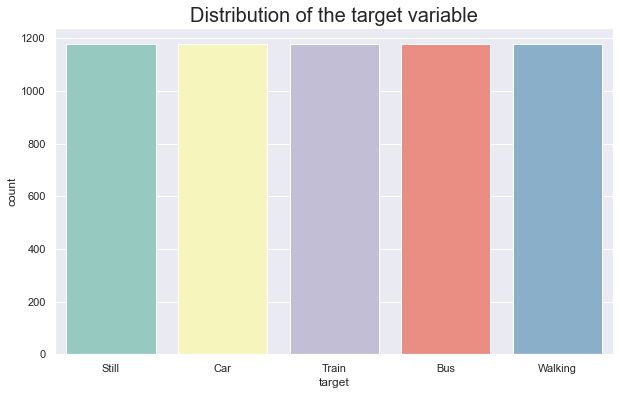

In [220]:
# Plot the target

plt.figure(figsize = (10, 6))
sns.countplot(x='target',data= data, palette ='Set3')
plt.title("Distribution of the target variable", fontsize = 20)
#plt.savefig("Target")

### Drop extra features with Null values(more)

In [221]:
data.keys()

Index(['time', 'activityrecognition#1', 'android.sensor.accelerometer#mean',
       'android.sensor.accelerometer#min', 'android.sensor.accelerometer#max',
       'android.sensor.accelerometer#std',
       'android.sensor.game_rotation_vector#mean',
       'android.sensor.game_rotation_vector#min',
       'android.sensor.game_rotation_vector#max',
       'android.sensor.game_rotation_vector#std',
       'android.sensor.gravity#mean', 'android.sensor.gravity#min',
       'android.sensor.gravity#max', 'android.sensor.gravity#std',
       'android.sensor.gyroscope#mean', 'android.sensor.gyroscope#min',
       'android.sensor.gyroscope#max', 'android.sensor.gyroscope#std',
       'android.sensor.gyroscope_uncalibrated#mean',
       'android.sensor.gyroscope_uncalibrated#min',
       'android.sensor.gyroscope_uncalibrated#max',
       'android.sensor.gyroscope_uncalibrated#std',
       'android.sensor.light#mean', 'android.sensor.light#min',
       'android.sensor.light#max', 'android.senso

In [222]:
data = data.drop(['android.sensor.light#mean', 'android.sensor.light#min','android.sensor.step_counter#mean', 'android.sensor.step_counter#min',
                   'android.sensor.step_counter#max', 'android.sensor.step_counter#std','android.sensor.magnetic_field#mean','android.sensor.magnetic_field_uncalibrated#mean',
                    'android.sensor.magnetic_field_uncalibrated#min','android.sensor.magnetic_field_uncalibrated#max','android.sensor.magnetic_field_uncalibrated#std',
                    'android.sensor.magnetic_field#min','android.sensor.pressure#mean', 'android.sensor.pressure#min',
                    'android.sensor.pressure#max', 'android.sensor.pressure#std','android.sensor.proximity#mean', 'android.sensor.proximity#min',
                    'android.sensor.proximity#max', 'android.sensor.proximity#std','android.sensor.magnetic_field#max','android.sensor.magnetic_field#std',
                     'android.sensor.light#max', 'android.sensor.light#std'], axis=1)


In [223]:
data.shape

(5893, 43)

In [224]:
data.head()

,time,activityrecognition#1,android.sensor.accelerometer#mean,android.sensor.accelerometer#min,android.sensor.accelerometer#max,android.sensor.accelerometer#std,android.sensor.game_rotation_vector#mean,android.sensor.game_rotation_vector#min,android.sensor.game_rotation_vector#max,android.sensor.game_rotation_vector#std,...,android.sensor.rotation_vector#std,sound#mean,sound#min,sound#max,sound#std,speed#mean,speed#min,speed#max,speed#std,target
0,78.0,100.0,9.811476,9.758895,9.849411,0.014626,0.029340,0.029014,0.029526,0.000119,...,0.002109,NaN,NaN,NaN,NaN,0.000000,0.000000,0.000000,0.000000,Still
1,145.0,100.0,9.939207,7.707437,17.146631,1.775944,0.999925,0.999903,0.999946,0.000030,...,0.000026,89.200210,89.065143,89.335277,0.191013,16.539349,16.539349,16.539349,0.628595,Car
2,150.0,100.0,9.827178,9.804817,9.849262,0.011199,0.665215,0.665213,0.665218,0.000004,...,0.011312,NaN,NaN,NaN,NaN,0.000000,0.000000,0.000000,0.000000,Still
3,105.0,77.0,9.673039,7.659674,12.304298,0.862553,0.996221,0.993781,0.998661,0.003451,...,0.002788,87.470377,87.470377,87.470377,2.284186,17.739895,17.739895,17.739895,0.628595,Car
4,77.0,100.0,9.993466,8.965621,10.891645,0.504117,0.563792,0.521799,0.672664,0.064792,...,0.025608,89.770732,89.770732,89.770732,0.006389,9.000000,9.000000,9.000000,NaN,Car


In [225]:
mapper = {'Car': '0', 'Bus': '1', 'Train': '2', 'Walking': '3', 'Still': '4'}
data['target'] = data['target'].map(mapper)

In [227]:
data

,time,activityrecognition#1,android.sensor.accelerometer#mean,android.sensor.accelerometer#min,android.sensor.accelerometer#max,android.sensor.accelerometer#std,android.sensor.game_rotation_vector#mean,android.sensor.game_rotation_vector#min,android.sensor.game_rotation_vector#max,android.sensor.game_rotation_vector#std,...,android.sensor.rotation_vector#std,sound#mean,sound#min,sound#max,sound#std,speed#mean,speed#min,speed#max,speed#std,target
0,78.0,100.0,9.811476,9.758895,9.849411,0.014626,0.029340,0.029014,0.029526,0.000119,...,0.002109,NaN,NaN,NaN,NaN,0.000000,0.000000,0.000000,0.000000,4
1,145.0,100.0,9.939207,7.707437,17.146631,1.775944,0.999925,0.999903,0.999946,0.000030,...,0.000026,89.200210,89.065143,89.335277,0.191013,16.539349,16.539349,16.539349,0.628595,0
2,150.0,100.0,9.827178,9.804817,9.849262,0.011199,0.665215,0.665213,0.665218,0.000004,...,0.011312,NaN,NaN,NaN,NaN,0.000000,0.000000,0.000000,0.000000,4
3,105.0,77.0,9.673039,7.659674,12.304298,0.862553,0.996221,0.993781,0.998661,0.003451,...,0.002788,87.470377,87.470377,87.470377,2.284186,17.739895,17.739895,17.739895,0.628595,0
4,77.0,100.0,9.993466,8.965621,10.891645,0.504117,0.563792,0.521799,0.672664,0.064792,...,0.025608,89.770732,89.770732,89.770732,0.006389,9.000000,9.000000,9.000000,NaN,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5888,4.0,100.0,10.066610,4.564648,13.414389,3.373972,0.986319,0.974523,0.992084,0.007186,...,0.008767,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3
5889,32.0,10.0,9.964271,8.768007,11.454213,0.665529,0.648602,0.648343,0.648974,0.000331,...,0.018447,NaN,NaN,NaN,NaN,31.960054,31.960054,31.960054,NaN,2
5890,86.0,100.0,9.812893,9.772881,9.862587,0.017633,0.024392,0.024081,0.024696,0.000211,...,0.002659,NaN,NaN,NaN,NaN,0.000000,0.000000,0.000000,0.000000,4
5891,199.0,100.0,9.831144,9.807347,9.874450,0.013485,0.481212,0.481209,0.481216,0.000002,...,0.000005,NaN,NaN,NaN,NaN,1.090415,1.090415,1.090415,NaN,4


In [228]:
data.corr()["target"].abs().sort_values().plot.barh()
plt.title("Correlation of features in the Dataset", fontsize = 25)
plt.xlabel("Correlation", fontsize = 20)
plt.ylabel("Features", fontsize = 20)

KeyError: 'target'

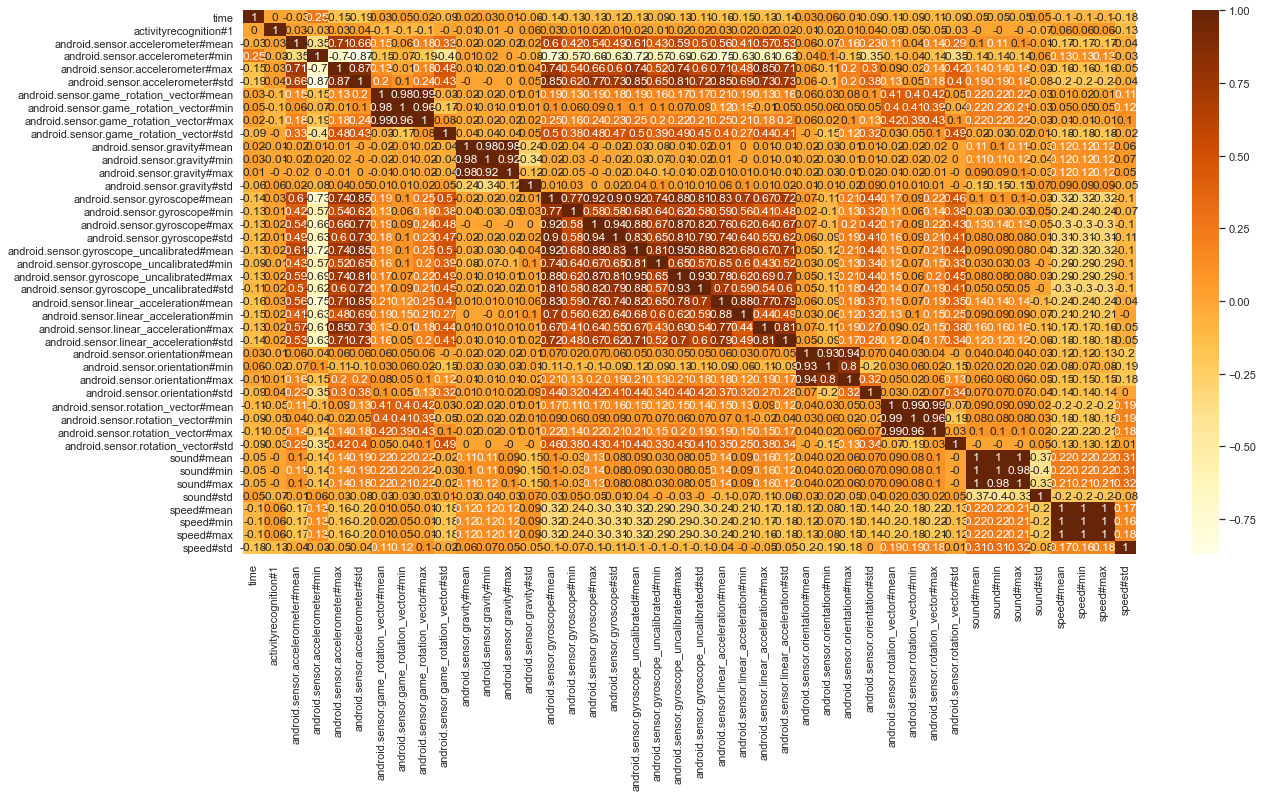

In [230]:
matrix = data.corr().round(2)
sns.set(rc={"figure.figsize":(20,10)})
sns.heatmap(matrix, annot=True, cmap="YlOrBr")
plt.show()